{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Aggregate the geometry of spatial data using `dissolve` based on an attribute in `Python`
* Aggregate the quantitative values in your attribute table when you perform a dissolve in `Python`


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the spatial-vector-lidar data subset created for the course. 

[<i class="fa fa-download" aria-hidden="true"></i> Download spatial-vector-lidar data subset (~172 MB)](https://ndownloader.figshare.com/files/12459464){:data-proofer-ignore='' .btn }

</div>

In this lesson, you will use `Python` to aggregate (i.e. dissolve) the spatial boundaries of the United States state boundaries using a region name that is an attribute of the dataset. Then, you will aggregate the values in the attribute table, so that the quantitative values in the attribute table will reflect the new spatial boundaries for regions. 


## Import Packages and Data 

To get started, `import` the packages you will need for this lesson into `Python` and set the current working directory. 

In [73]:
# import necessary packages to work with spatial data in Python
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import earthpy as et 

# make figures plot inline
plt.ion()

# load the box module from shapely
from shapely.geometry import box

In [74]:
# set the current working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## Dissolve Polygons Based On an Attribute with Geopandas

Dissolving polygons entails combining polygons based upon a unique attribute value and removing the interior geometry. 

<figure>
 <a href="{{ site.url }}/images/courses/earth-analytics/spatial-data/dissolve-polygons-esri.gif">
 <img src="{{ site.url }}/images/courses/earth-analytics/spatial-data/dissolve-polygons-esri.gif"></a>
 <figcaption> When you dissolve polygons you remove interior boundaries of a set of polygons with the same attribute value and create one new "merged" or combined polygon for each attribute value. In the case above US states are dissolved to regions in the United States. Source: ESRI
 </figcaption>
</figure>

Below you will dissolve the US states polygons by the region that each state is in. When you dissolve, you will create a new set polygons - one for each region in the United States.

To begin, explore your data. Using `.geom_type` you can see that you have a mix of single and multi polygons in your data. Sometimes multi-polygons can cause problems when processing. It's always good to check your geometry before you begin to better know what you are working with. 

In [75]:
# query the first few records of the geom_type column
state_boundary_us.geom_type.head()

0    MultiPolygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

Next, select the columns that you with to use for the dissolve and that will be retained. 

In this case, we want to retain the columns:

* region 
* geometry

In [76]:
# select the columns that you with to use for the dissolve and that will be retained
state_boundary = state_boundary_us[['region', 'geometry']]

# dissolve the state boundary by region 
us_regions = state_boundary.dissolve(by='region')

# view the resulting geodataframe
us_regions

,geometry
region,
Midwest,"(POLYGON Z ((-82.863342 41.693693 0, -82.82571..."
Northeast,"(POLYGON Z ((-76.04621299999999 38.025533 0, -..."
Southeast,"(POLYGON Z ((-81.81169299999999 24.568745 0, -..."
Southwest,"POLYGON Z ((-94.48587499999999 33.637867 0, -9..."
West,"(POLYGON Z ((-118.594033 33.035951 0, -118.540..."


And finally, plot the data. Note that when you dissolve, the column used to perform the dissolve becomes an index for the resultant geodataframe. Thus, you will have to use the reset_index() method when you plot, to access the `region` column.

If you do not reset the index, the following will return and error, as region is no longer a column, it is an index!
`us_regions.plot(column = 'region', ax=ax)`

You can use `us_regions.reset_index().plot(column = 'region', ax=ax)` to reset the index when you plot the data.

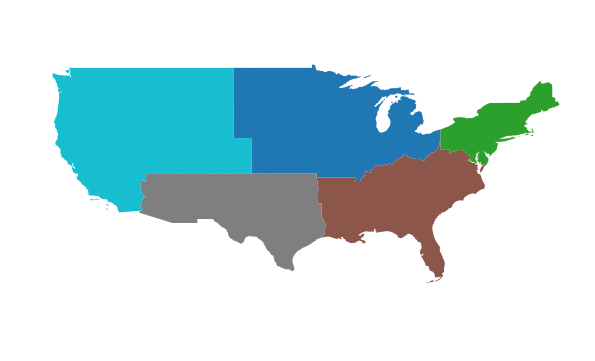

In [77]:
# create the plot
fig, ax = plt.subplots(figsize = (10,6))

# plot the data 
us_regions.reset_index().plot(column = 'region', ax=ax)

# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

## Dissolve and Aggregate Data Attributes

In the example above, you dissolved the state level polygons to a region level. However, you did not aggregate or summarize the attributes associated with each polygon. 

Next, you will learn how to aggregate quantitative values in your attribute table when you perform a dissolve. To do this, you will add `aggfunc = 'summaryfunction'` to your dissolve call. 

You can choice a suite of different summary functions including:

* first
* last
* mean
* max

And more. <a href = "http://geopandas.org/aggregation_with_dissolve.html" target = "_blank">Read more about the dissolve function here.</a> 

Aggregate the data using the 'sum' method on the ALAND and AWATER attributes (total land and water area). 

The values for ALAND and AWATER will be added up for all of the states in a region. Those new summed values will be returned in the new dataframe. 

In [78]:
# select the columns that you wish to retain in the data
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

# then summarize the quantative columns by 'sum' 
regions_agg = state_boundary.dissolve(by='region', aggfunc = 'sum')

# display the new dataframe
regions_agg

,geometry,ALAND,AWATER
region,,,
Midwest,"(POLYGON Z ((-82.863342 41.693693 0, -82.82571...",1943869253244,184383393833
Northeast,"(POLYGON Z ((-76.04621299999999 38.025533 0, -...",869066138232,108922434345
Southeast,"(POLYGON Z ((-81.81169299999999 24.568745 0, -...",1364632039655,103876652998
Southwest,"POLYGON Z ((-94.48587499999999 33.637867 0, -9...",1462631530997,24217682268
West,"(POLYGON Z ((-118.594033 33.035951 0, -118.540...",2432336444730,57568049509


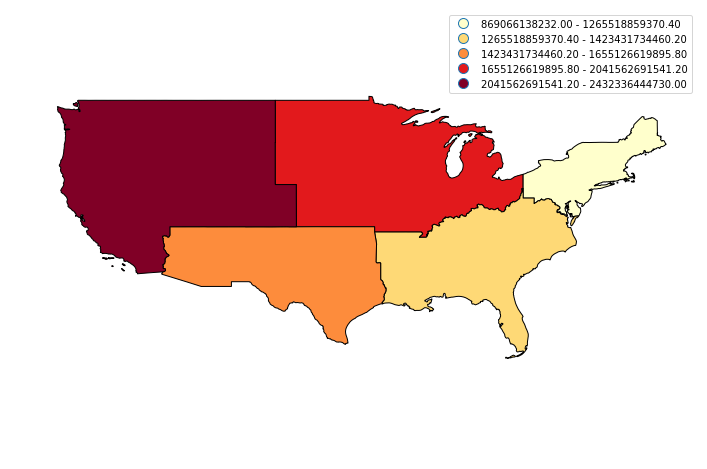

In [79]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(column = 'ALAND', edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge 1

Create a quantile map using the AWATER attribute column. 

</div>

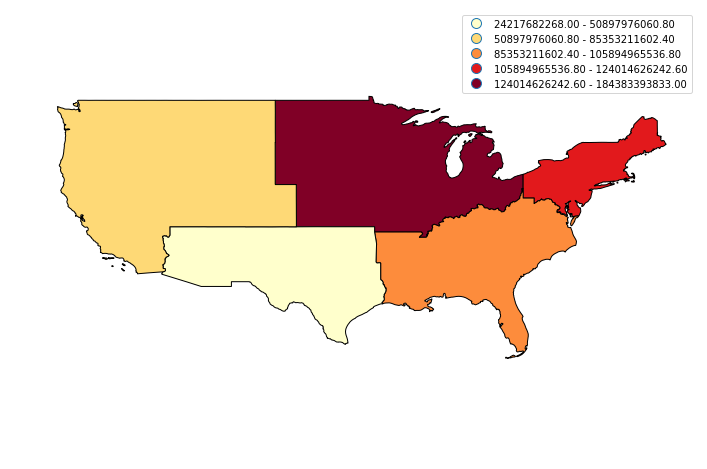

In [80]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new AWATER values
regions_agg.plot(column = 'AWATER', edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge 2

Aggregate the data using the 'mean' method on the ALAND and AWATER attributes (total land and water area). Then create two maps:

1. a map of mean value for ALAND by region and 
2. a map of mean value for AWATER by region

</div>

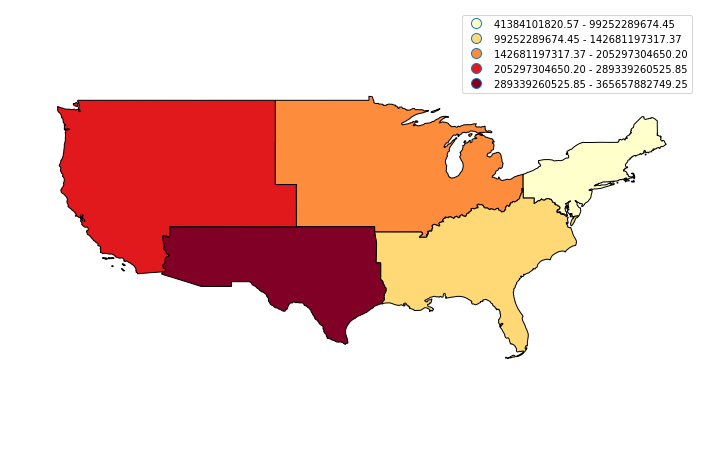

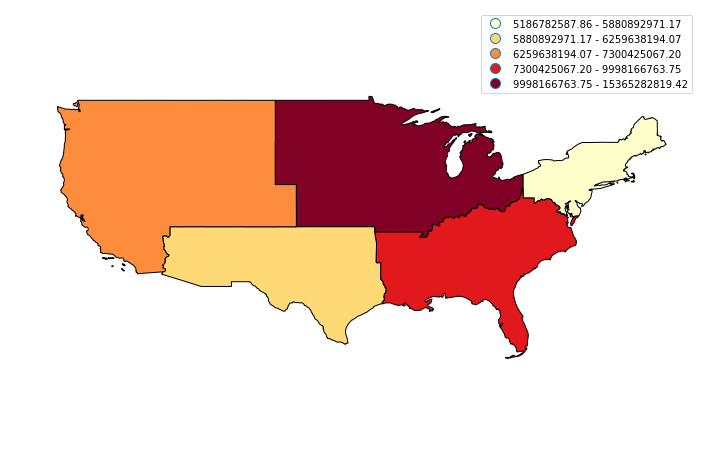

In [81]:
# select the columns that you wish to retain in the data
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

# then summarize the quantative columns by 'sum' 
regions_agg = state_boundary.dissolve(by='region', aggfunc = 'mean')

# display the new dataframe
regions_agg

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(column = 'ALAND', edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new AWATER values
regions_agg.plot(column = 'AWATER', edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

* Credit to: http://darribas.org/gds16/content/labs/lab_02.html